In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt

In [46]:


#def fromatXvals(X):
#    formattedX = []
#    i = 0
#    for i in range(len(X)):
#        columns = [X[i][j*6:(j+1)*6] for j in range(7)]
#        formattedX.append( np.flipud(np.array(columns).T) )# transposing to get the expes

# Load dataset
data = pd.read_csv('Data/connect+4/connect-4.data', header=None)
#print (data)
# --- formatting X values --- 
# Map cell values
cellMap = {'x': 1, 'o': 2, 'b': 0}
X = data.iloc[:, :-1].map(lambda x: cellMap.get(x, x))
X = X.to_numpy() ## x is input values 
#formattedX = fromatXvals(X) ## getting x to look like a connect 4 boards for display only
print(X[0])
#print(formattedX)

# --- formating Y values ---
y = data.iloc[:, -1] # getting form 

def encodeLabel(label):
    labelMap = {
        'loss': -1.0,
        'draw': 0.0,
        'win': 1.0
    }
    return labelMap[label]


    
# Convert to  encoded labels
y  = np.array([encodeLabel(label) for label in y])
#print(y)# test

print(X.shape)  # Should be (number_of_samples, 6, 7)
print(y.shape)  # Should be (number_of_samples,)

[0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 2 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
(67557, 42)
(67557,)


In [87]:
unique, counts = np.unique(yTrain, return_counts=True)
print(dict(zip(unique, counts)))

{-1.0: 13294, 0.0: 5154, 1.0: 35597}


In [138]:
# resampling the data as wins are to large of a propoptions 
# Stack features and labels together
data = np.hstack((XTrain, yTrain.reshape(-1, 1)))

# Split by label
lossData  = data[yTrain == -1.0]
drawData  = data[yTrain ==  0.0]
winData   = data[yTrain ==  1.0]

# Downsample all to match loss_data (or smallest group, draw_data)
minLength = min(len(lossData), len(drawData)) # finding smalest data set 

winDataResised = resample(winData, replace=False, n_samples=minLength, random_state=42)
lossDataResised = resample(lossData, replace=False, n_samples=minLength, random_state=42)

# Combine and shuffle
balancedData = np.vstack([lossDataResised, drawData, winDataResised])
np.random.shuffle(balancedData)

XBalanced = balancedData[:, :-1]
yBalanced = balancedData[:, -1]


In [107]:
for i in range(0,len(XBalanced)):
    print(XBalanced[i])
    print(yBalanced[i])
    

[0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[1. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
-1.0
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0.]
1.0
[1. 2. 2. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
-1.0
[1. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 2. 0. 0.]
-1.0
[1. 0. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0.]
-1.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 1. 2. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[2. 1. 0. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 

In [180]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
    

{-1.0: 16635, 0.0: 6449, 1.0: 44473}


In [140]:
unique, counts = np.unique(yBalanced, return_counts=True)
print(dict(zip(unique, counts)))


{-1.0: 4095, 0.0: 4095, 1.0: 4095}


In [192]:
# spritting the data for train/ testing 

XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, 
    test_size=0.2,   
    random_state=42 ## locks random state for debugging nothing to do with board size
)

print(yTrain)
print(XTrain)

[ 1.  1.  1. ... -1.  1.  1.]
[[1 2 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]]


In [194]:
unique, counts = np.unique(yTrain, return_counts=True)
print(dict(zip(unique, counts)))

{-1.0: 13294, 0.0: 5154, 1.0: 35597}


In [200]:
# Balancing classes instead of above
classes = np.array([-1.0, 0.0, 1.0])
classWeights = compute_class_weight(class_weight='balanced', classes=classes, y=yTrain)
classWeightsDict = {class_: weight for class_, weight in zip([-1.0, 0.0, 1.0], classWeights)} # _ to stop class being key word 

print(classWeightsDict)

{-1.0: 1.3551226117045283, 0.0: 3.4953434225844005, 1.0: 0.5060819731999887}


In [222]:
## usings liner regression 
## creating models with varing amounts of neurons to see which is teh best speed accuracy trade off



def buildModel(n):
    model = Sequential()
    # Input layer
    model.add(Input(shape=(42,)))
    model.add(Dense(2**n, activation='relu'))
    
    # 1st Hidden layer 
    model.add(Dense(2**(n-1), activation='relu'))
    model.add(Dropout(0.3))  
    
    # 2nd Hidden layer 
    model.add(Dense(2**(n-2), activation='relu'))
    model.add(Dropout(0.3))  
    
    # Output layer 1 neurons for score of vals range of -1 to 1 
    model.add(Dense(1, activation='tanh'))
    
    
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])
    return model



 ## testing the data with differnt epoch values
results = pd.DataFrame(columns=['epochs', 'neurons', 'mae' , 'mse'])
n = 4
while n <= 9:
    epochVal = 10
    while epochVal <= 30:
        model = buildModel(n); # building the model so it dosent over train 
        model.fit(XTrain, yTrain, epochs=epochVal, batch_size=32, validation_split=0.2, class_weight=classWeightsDict)
        loss, mae, mse = model.evaluate(XTest, yTest)
        ## adding to data stucture 
        newResult = {'epochs': epochVal, 'neurons': 2**n, 'mae': mae ,'mse': mse }
        results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)
        epochVal+=5
    n+=1
# formating data 
formatedResultsMSE = results.pivot(index='epochs', columns='neurons', values='mse')
formatedResultsMAE = results.pivot(index='epochs', columns='neurons', values='mae')
#print(formatedResults)

Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7043 - mae: 0.9111 - mse: 0.9453 - val_loss: 0.8626 - val_mae: 0.8863 - val_mse: 0.8626
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6386 - mae: 0.8812 - mse: 0.8621 - val_loss: 0.8541 - val_mae: 0.8804 - val_mse: 0.8541
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6254 - mae: 0.8660 - mse: 0.8438 - val_loss: 0.7779 - val_mae: 0.8358 - val_mse: 0.7779
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6077 - mae: 0.8428 - mse: 0.8116 - val_loss: 0.7719 - val_mae: 0.8272 - val_mse: 0.7719
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5970 - mae: 0.8283 - mse: 0.7958 - val_loss: 0.7394 - val_mae: 0.8015 - val_mse: 0.7394
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5794 - mae: 0.8009 - mse: 0.7625 - val_loss: 0.7124 - val_mae: 0.7849 - val_mse: 0.7124
Epoch 7/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5707 - mae: 0.7895 - mse

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_2344\775715685.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6699 - mae: 0.8973 - mse: 0.8950 - val_loss: 0.8542 - val_mae: 0.8804 - val_mse: 0.8542
Epoch 2/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6405 - mae: 0.8801 - mse: 0.8640 - val_loss: 0.8472 - val_mae: 0.8764 - val_mse: 0.8472
Epoch 3/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6280 - mae: 0.8690 - mse: 0.8476 - val_loss: 0.8196 - val_mae: 0.8609 - val_mse: 0.8196
Epoch 4/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6153 - mae: 0.8520 - mse: 0.8259 - val_loss: 0.7473 - val_mae: 0.8077 - val_mse: 0.7473
Epoch 5/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5830 - mae: 0.8101 - mse: 0.7731 - val_loss: 0.7203 - val_mae: 0.7890 - val_mse: 0.7203
Epoch 6/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5569 - mae: 0.7734 - mse: 0.7315 - val_loss: 0.6878 - val_mae: 0.7514 - val_mse: 0.6878
Epoch 7/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5296 - mae: 0.7341 - mse: 0.6892 - 

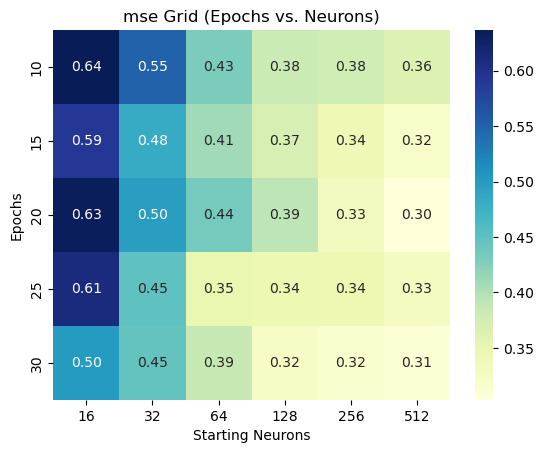

In [224]:
## heat map code for mse
sns.heatmap(formatedResultsMSE, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("mse Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

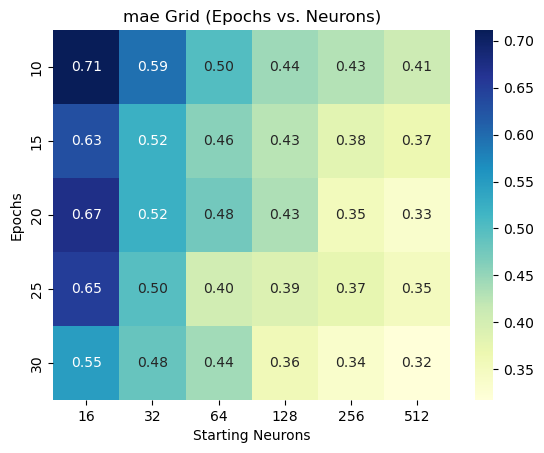

In [226]:
## heat map code for mae
sns.heatmap(formatedResultsMAE, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("mae Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

In [208]:
#formatedResults
best = results.loc[results['mse'].idxmin()]
print(f"Best config: epochs={best['epochs']}, neurons={best['neurons']}, mse={best['mse']}")

Best config: epochs=30, neurons=256, mse=0.2943328022956848


Epoch 1/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6483 - mae: 0.8705 - mse: 0.8617 - val_loss: 0.6708 - val_mae: 0.7566 - val_mse: 0.6708
Epoch 2/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5118 - mae: 0.7165 - mse: 0.6582 - val_loss: 0.5061 - val_mae: 0.6048 - val_mse: 0.5061
Epoch 3/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4270 - mae: 0.5992 - mse: 0.5345 - val_loss: 0.5033 - val_mae: 0.5785 - val_mse: 0.5033
Epoch 4/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3861 - mae: 0.5399 - mse: 0.4754 - val_loss: 0.4231 - val_mae: 0.4985 - val_mse: 0.4231
Epoch 5/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3603 - mae: 0.5001 - mse: 0.4368 - val_loss: 0.4026 - val_mae: 0.4572 - val_mse: 0.4026
Epoch 6/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3423 - mae: 0.4769 - mse: 0.4128 - val_loss: 0.4086 - val_mae: 0.4720 - val_mse: 0.4086
Epoch 7/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3268 - mae: 0.4558 - mse

Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_862 (Dense)                    │ (None, 256)                 │          11,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_863 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_358 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_864 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_359 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_865 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,677 (612.02 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,452 (408.02 KB)

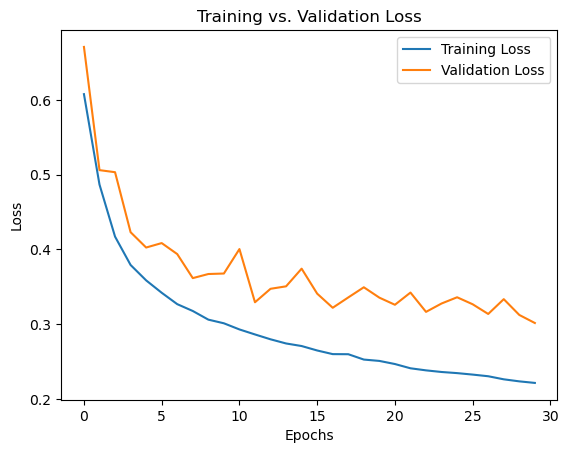

In [230]:
## the best model
bestModel = Sequential()

# Input layer 
bestModel.add(Input(shape=(42,)))
bestModel.add(Dense(best['neurons'], activation='relu'))

# 1st Hidden layer
bestModel.add(Dense(int(best['neurons']/2), activation='relu'))
bestModel.add(Dropout(0.5))  

# 2nd Hidden layer 
bestModel.add(Dense(int(best['neurons']/4), activation='relu'))
bestModel.add(Dropout(0.5))  

# Output layer 1 neurons for score of vals range of -1 to 1 
bestModel.add(Dense(1, activation='tanh'))


bestModel.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])
history = bestModel.fit(XTrain, yTrain, epochs=best['epochs'], batch_size=32, validation_split=0.2, class_weight=classWeightsDict)
bestModel.summary()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [232]:
#testing 

loss, mae, mse = model.evaluate(XTest, yTest)
## adding to data stucture 
newResult = {'epochs': epochVal, 'neurons': best['neurons'], 'mae': mae ,'mse': mse }
print(newResult)

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.3065 - mae: 0.3156 - mse: 0.3065
{'epochs': 35, 'neurons': 256, 'mae': 0.31770071387290955, 'mse': 0.31000739336013794}


In [244]:
#tests for game agent
winBoard = [
    1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0
]

loseBoard = [
    2, 2, 2, 2, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    2,  2,  2, 0, 0, 0, 0
]

drawBoard = [ # wrong 
    1, 2, 1, -1, 1, -1, 1,
    -1, 1, -1, 1, -1, 1, -1,
    1, -1, 1, -1, 1, -1, 1,
    -1, 1, -1, 1, -1, 1, -1,
    1, -1, 1, -1, 1, -1, 1,
    -1, 1, -1, 1, -1, 1, -1
]

midgameBoard = [
    0,  0,  0,  0,  0,  0,  0,
    0,  0,  0,  0,  0,  0,  0,
    0,  0,  1, 2,  0,  0,  0,
    0,  1, 2,  1,  0,  0,  0,
    2, 2,  1, 2,  0,  0,  0,
    1,  1, 2,  1,  0,  0,  0
]
boards = [winBoard, loseBoard, midgameBoard]
for i, board in enumerate(boards):
    pred = bestModel.predict(np.array([board]))[0][0]
    print(f"Board {i+1} prediction: {pred:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Board 1 prediction: 0.999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Board 2 prediction: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Board 3 prediction: 1.000


In [236]:
preds = model.predict(XTest).flatten()
print(np.min(preds), np.max(preds), np.mean(preds))
#print(np.histogram(preds, bins=10))

for val in [-1.0, 0.0, 1.0]:
    groupPreds = preds[yTest == val]
    print(f"True {val}:")
    print(f"  Mean prediction = {np.mean(groupPreds):.3f}")
    print(f"  Std. deviation  = {np.std(groupPreds):.3f}")
    print(f"  Sample count    = {len(groupPreds)}")

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
-1.0 1.0 0.32930964
True -1.0:
  Mean prediction = -0.587
  Std. deviation  = 0.497
  Sample count    = 3341
True 0.0:
  Mean prediction = -0.006
  Std. deviation  = 0.484
  Sample count    = 1295
True 1.0:
  Mean prediction = 0.723
  Std. deviation  = 0.451
  Sample count    = 8876


In [238]:
bestModel.save("Models/NeuaralNetworkLR_Connect4.h5")